In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
from sklearn import preprocessing
string_columns = ["job","marital","education","default","housing","loan","contact","month","poutcome","y"]
for i in string_columns:
    number = preprocessing.LabelEncoder()
    data[i] = number.fit_transform(data[i])
    

In [20]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  float64
 9   day        45211 non-null  float64
 10  month      45211 non-null  float64
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  float64
 16  y          45211 non-null  float64
dtypes: float64(17)
memory usage: 5.9 MB


In [21]:
X=data.iloc[:,0:16]
Y=data.iloc[:,-1]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [24]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39279   643]
 [ 4437   852]]


In [28]:
accuracy=((39279+852)/(39279+852+643+4437))*100
accuracy

88.76379642122492

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

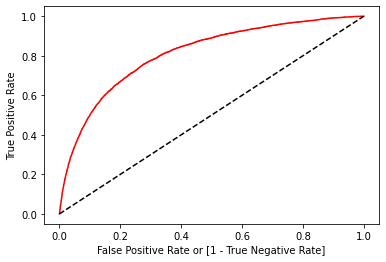

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [31]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [32]:
data_norm=norm(data)
data_norm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.0,0.0,0.0,1.0,0.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.0,0.0,0.0,1.0,0.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0,0.0,1.0,0.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.0,0.0,0.0,1.0,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.0,0.0,0.0,1.0,0.0


In [33]:
A=data_norm.iloc[:,0:16]
B=data_norm.iloc[:,-1]
classifier = LogisticRegression()
classifier.fit(A,B)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = classifier.predict(A)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [35]:
y_pred_df= pd.DataFrame({'actual': B,
                         'predicted_prob': classifier.predict(A)})

In [36]:
y_pred_df

,actual,predicted_prob
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
45206,1.0,1.0
45207,1.0,0.0
45208,1.0,1.0
45209,0.0,0.0


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(B,y_pred)
print (confusion_matrix)

[[39244   678]
 [ 4262  1027]]


In [40]:
accuracy_norm=((39244+1027)/(39244+1027+678+4262))*100
accuracy_norm

89.0734555749707

In [41]:
from sklearn.metrics import classification_report
print(classification_report(B,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     39922
         1.0       0.60      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

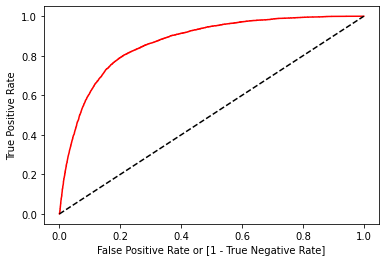

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(B, classifier.predict_proba (A)[:,1])

auc = roc_auc_score(B, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
